In [16]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
import warnings
import numpy as np

warnings.filterwarnings("ignore") 
iris = load_iris()

n_classes = len(iris.target_names)
plot_colors = "ryb"

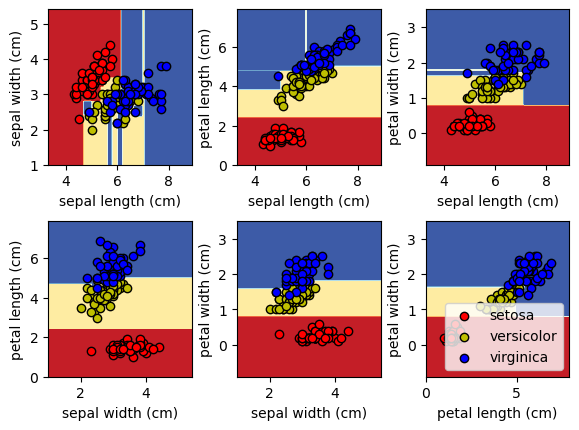

In [21]:
for pairIdx, pair in enumerate([[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]):
    
    X = iris.data[:, pair]
    y = iris.target
    
    clf = DecisionTreeClassifier().fit(X,y)
    
    ax = plt.subplot(2,3,pairIdx+1)
    plt.tight_layout(h_pad = 0.5,w_pad=0.5,pad=2.5)
    DecisionBoundaryDisplay.from_estimator(clf,X,cmap=plt.cm.RdYlBu,
                                           response_method="predict",
                                           ax=ax,
                                           xlabel=iris.feature_names[pair[0]],
                                           ylabel=iris.feature_names[pair[1]])
    
    for i,color in zip(range(n_classes),plot_colors):
        idx = np.where(y==i)
        plt.scatter(X[idx,0],X[idx,1],c=color,label=iris.target_names[i],cmap=plt.cm.RdYlBu,edgecolors="black")
plt.legend()
plt.savefig("iris_classifier.png")